##### Translação (Deslocamento)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('w3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(np.shape(img), img.shape[1], img.shape[0])

(1536, 1024, 3) 1024 1536


In [5]:
#Desloca a imagem nos eixos x e y usando uma matriz de transformação afim
deslocamento_x, deslocamento_y = 50, 100

"""

1 e 0 mantêm a escala original (sem distorção)

deslocamento_x e deslocamento_y definem o movimento em pixels

Valores positivos: direita/baixo | Valores negativos: esquerda/cima

"""

matriz_translacao = np.float32([[1, 0, deslocamento_x],  # [a, b, tx] → controla eixo X  
                               [0, 1, deslocamento_y]]) # [c, d, ty] → controla eixo Y  

In [6]:
# # Aplica translação  
img_transladada = cv2.warpAffine(img, matriz_translacao, (img.shape[1], img.shape[0]))

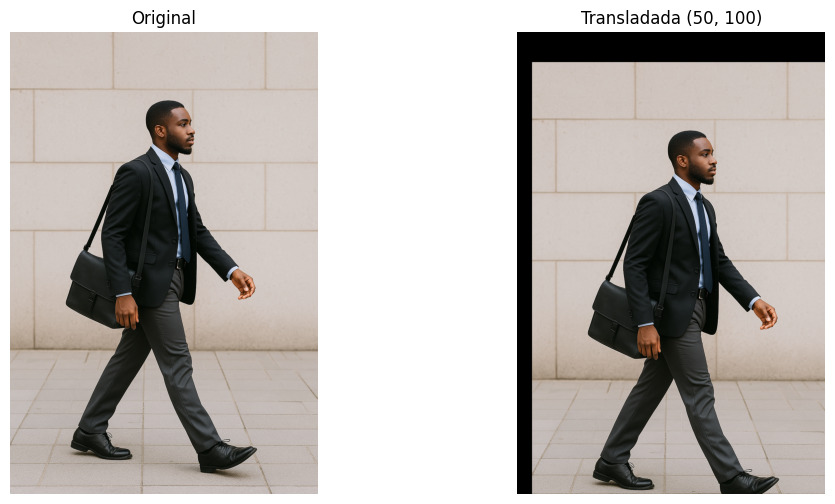

In [7]:
plt.figure(figsize=(12, 6))  
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original'), plt.axis('off')  
plt.subplot(1, 2, 2), plt.imshow(img_transladada), plt.title(f'Transladada ({deslocamento_x}, {deslocamento_y})'), plt.axis('off')  
plt.show()  

##### Rotação

In [9]:
(h, w) = img.shape[:2]
#print(h, w)

centro = (w // 2, h // 2)
#print(centro)

angulo = 45  # Graus
escala = 1.0
matriz_rotacao = cv2.getRotationMatrix2D(centro, angulo, escala)

img_rotacionada = cv2.warpAffine(img, matriz_rotacao, (w, h))

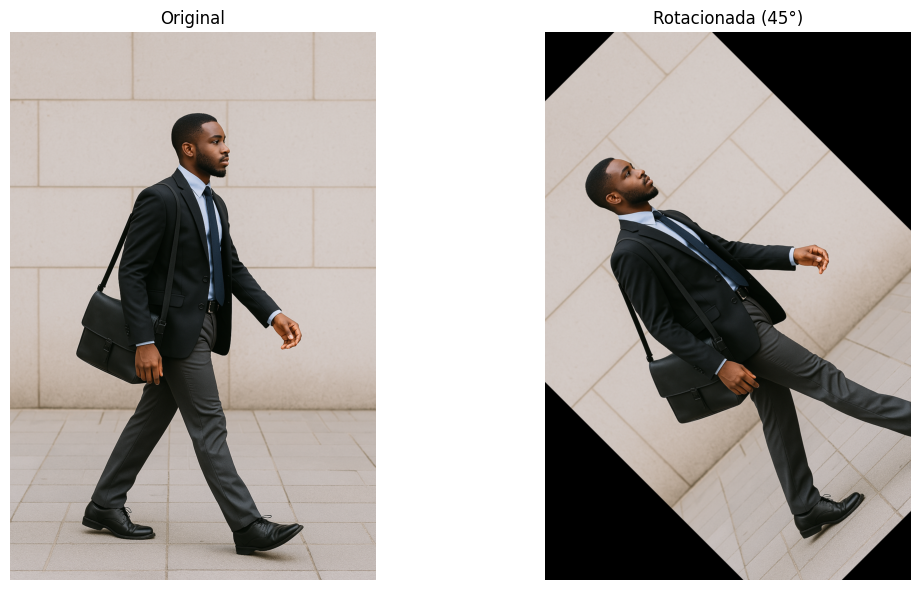

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_rotacionada), plt.title(f'Rotacionada ({angulo}°)'), plt.axis('off')
plt.tight_layout()
plt.show()

##### Escala (Redimensionamento)

In [12]:
nova_largura, nova_altura = 300, 200  # Novas dimensões (largura, altura)
img_redimensionada = cv2.resize(img, (nova_largura, nova_altura))

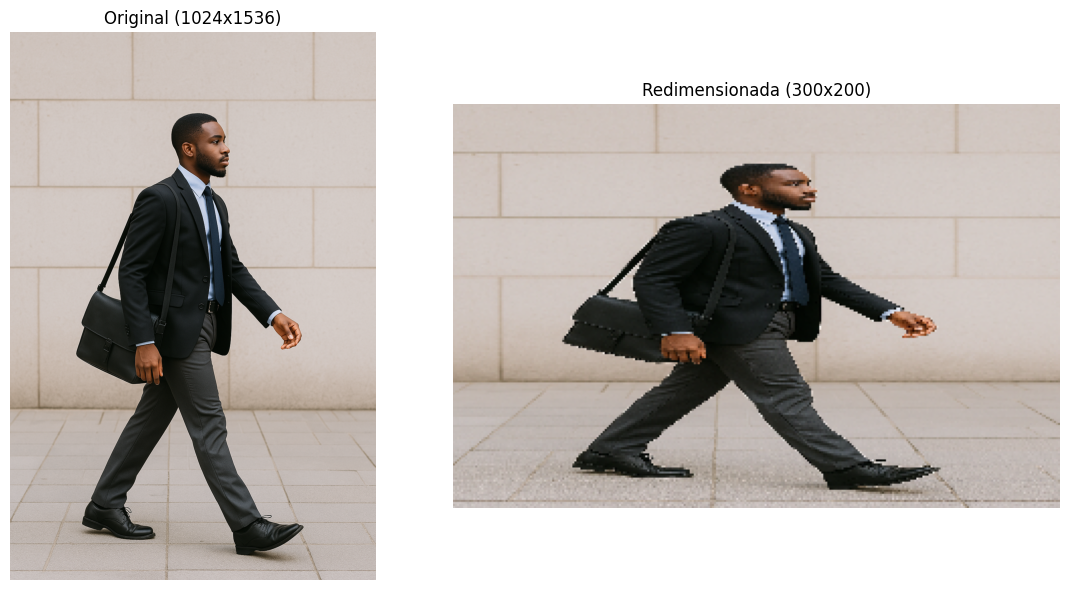

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img), plt.title(f'Original ({w}x{h})'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_redimensionada), plt.title(f'Redimensionada ({nova_largura}x{nova_altura})'), plt.axis('off')
plt.tight_layout()
plt.show()

##### Transformação de Perspectiva

In [16]:
pontos_originais = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pontos_destino = np.float32([[10, 100], [200, 50], [100, 250], [250, 200]])

matriz_perspectiva = cv2.getPerspectiveTransform(pontos_originais, pontos_destino)

img_perspectiva = cv2.warpPerspective(img, matriz_perspectiva, (w, h))

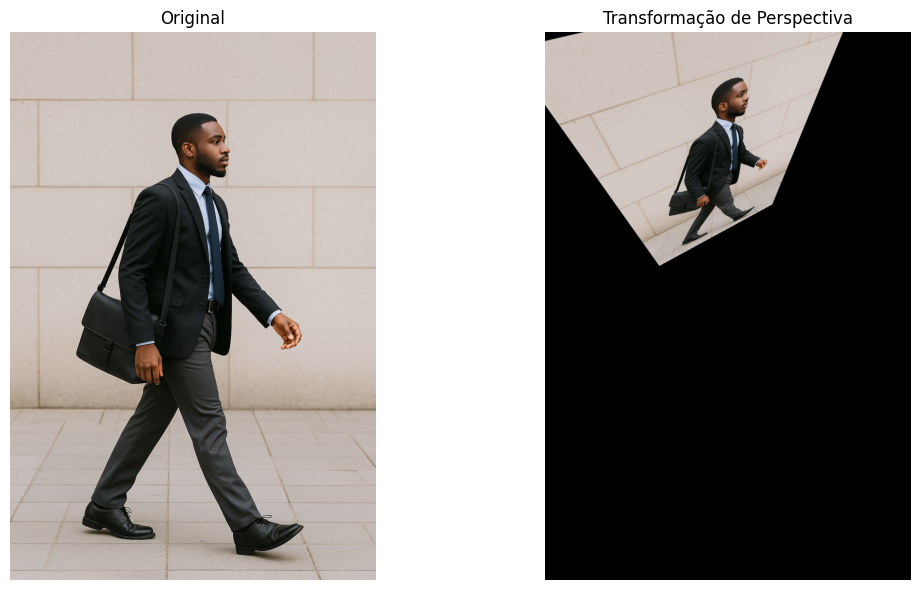

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_perspectiva), plt.title('Transformação de Perspectiva'), plt.axis('off')
plt.tight_layout()
plt.show()

##### Ajuste de Gamma para Clareamento de Imagens com OpenCV e Matplotlib

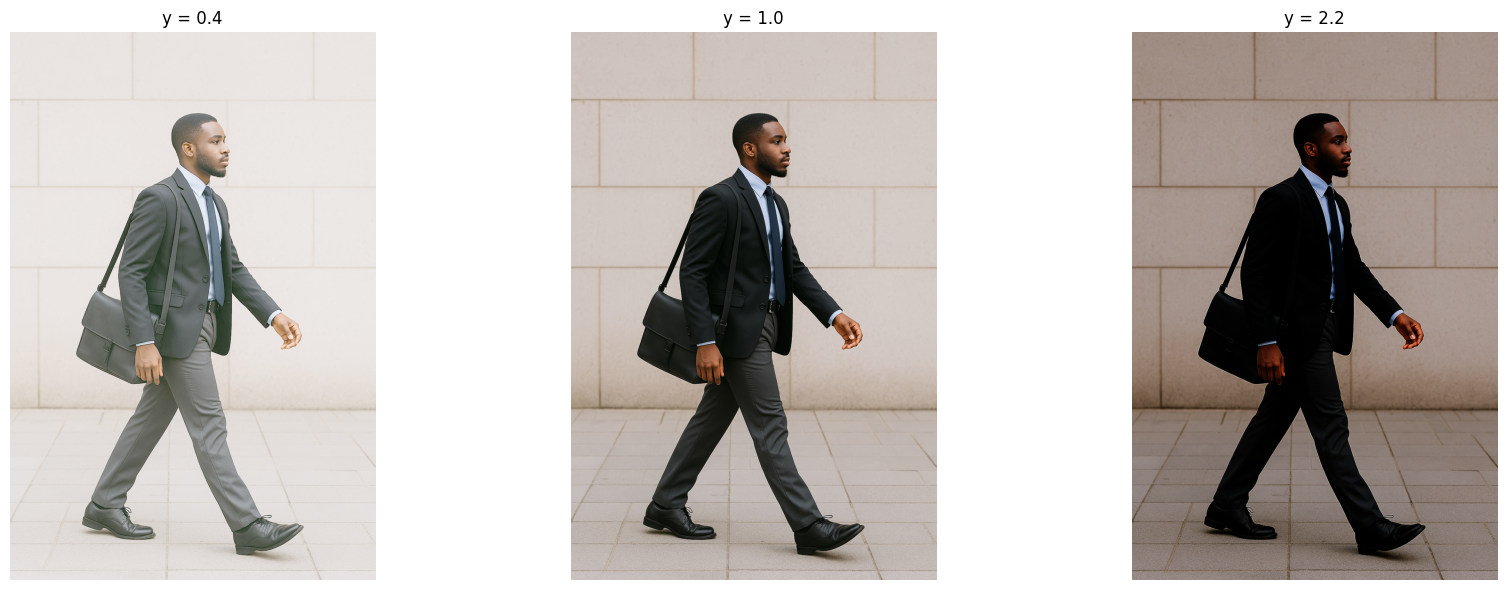

In [19]:
# Carregar imagem (OpenCV lê em BGR)
img = cv2.imread('w3.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Conversão para RGB

# Parâmetros de gamma
gamma_values = [0.4, 1.0, 2.2]  # Exemplos para clarear, original e escurecer

# Configurar plot
plt.figure(figsize=(18, 6))

for i, gamma in enumerate(gamma_values, 1):
    # Aplicar correção de gamma
    corrected = np.power(img_rgb/255., gamma)
    corrected_img = (corrected * 255).astype(np.uint8)
    
    # Plotar resultados
    plt.subplot(1, 3, i)
    plt.imshow(corrected_img)
    plt.title(f'y = {gamma}')
    plt.axis('off')

plt.tight_layout()
plt.show()